In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

Train, test and validation arrays normalized to:
[1.], [0.9991], [1.0021]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (10642, 1, 32) 
Shape of train set: (85140, 1, 32) 
Shape of validation set: (10643, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.22, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.025, loss_val=1.019, train=61.0%, val=61.3%
End of epoch 3: loss_tr=0.916, loss_val=0.907, train=63.9%, val=63.7%
End of epoch 5: loss_tr=0.838, loss_val=0.827, train=67.3%, val=67.8%
End of epoch 7: loss_tr=0.813, loss_val=0.809, train=68.5%, val=68.6%
End of epoch 9: loss_tr=0.829, loss_val=0.819, train=67.3%, val=67.5%
End of epoch 11: loss_tr=0.766, loss_val=0.759, train=70.3%, val=70.6%
End of epoch 13: loss_tr=0.773, loss_val=0.766,

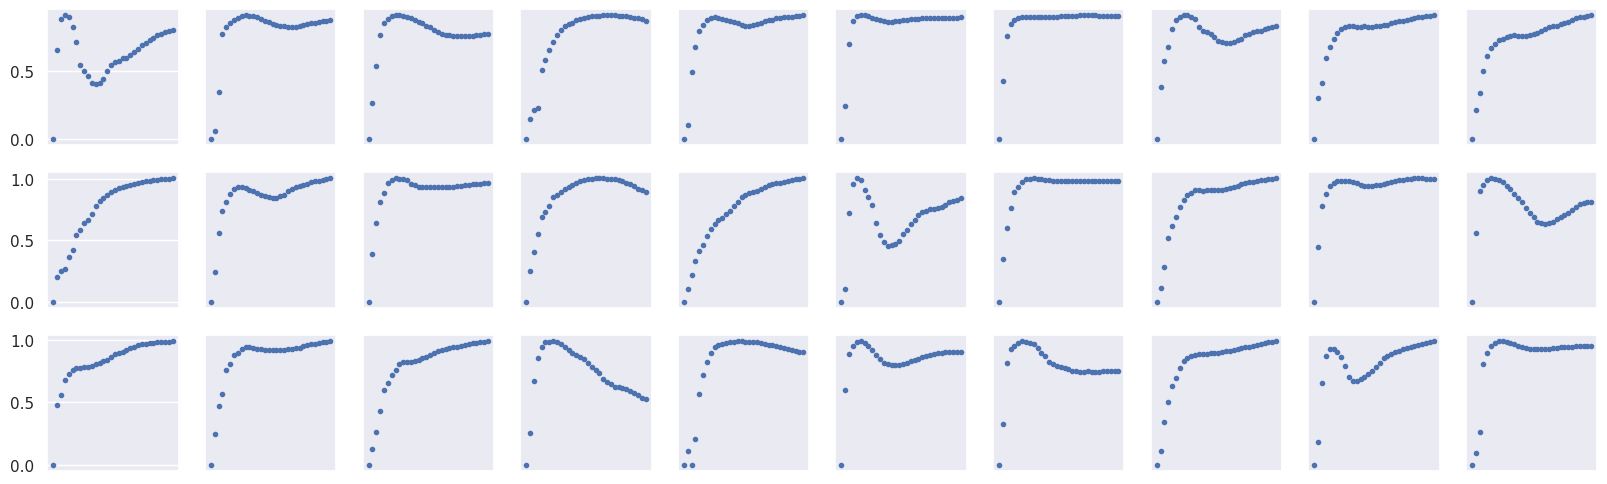

In [2]:
# Standard example 
from peratouch.data import Data 
from peratouch.trainer import Trainer 
from peratouch.results import Results 
from peratouch.networks import CNN
# from peratouch.config import datapath_five_users
from peratouch.config import path_five_users_main, path_five_users_first

D = Data(path_five_users_main, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
# D.plot_data()
model = CNN(input_ch=1)
T = Trainer(D)
T.setup(model, max_epochs=20, batch_size=5000)
T.train_model(model)
# T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=False)
R.find_most_uncertain_preds()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9997 0.9999 1.0014], [0.9995 1.0002 1.0009]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106410, 3, 32) 
Labels shape:  (106410,) 
Shape of test set: (10641, 3, 32) 
Shape of train set: (85128, 3, 32) 
Shape of validation set: (10641, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.21, 0.21, 0.16] 
Fraction of validation labels:  [0.22, 0.19, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.014, loss_val=1.005, train=59.6%, val=60.5%
End of epoch 3: loss_tr=0.765, loss_val=0.756, train=70.8%, val=71.2%
End of epoch 5: loss_tr=0.720, loss_val=0.715, train=72.5%, val=72.8%
End of epoch 7: loss_tr=0.705, loss_val=0.701, train=72.5%, val=72.8%
End of epoch 9: loss_tr=0.670, loss_val=0.660, train=74.1%, val=74.7%
End of epoch 11: loss_tr=0.654, loss_val=0.646, train=74.6%, val=74.9%
End of epoch 

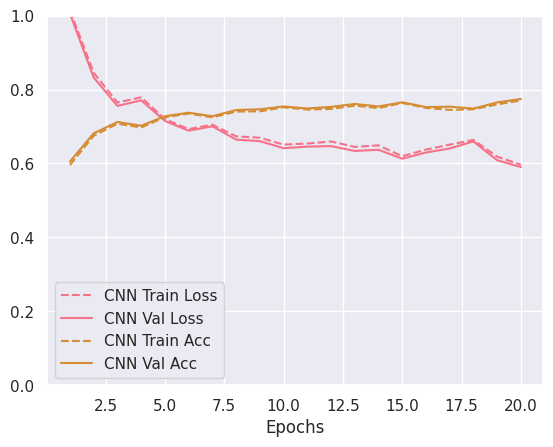

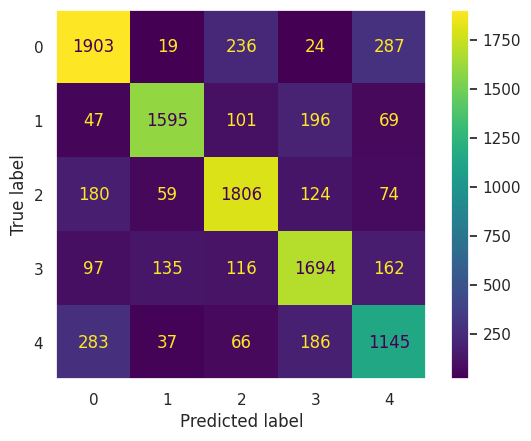

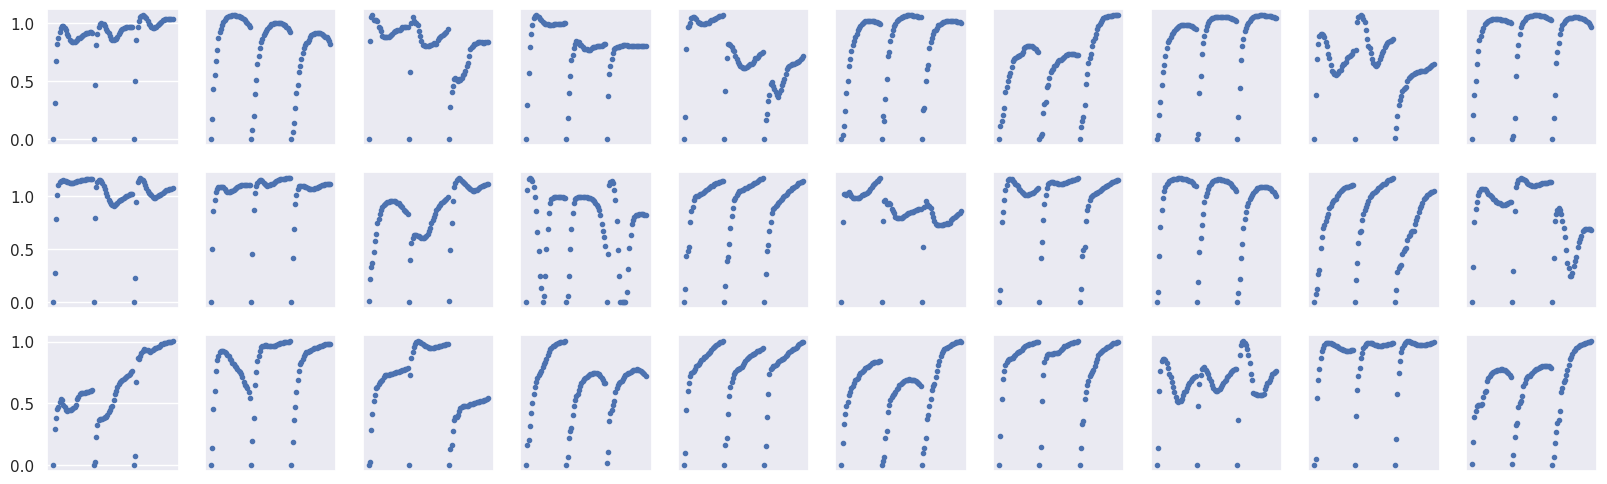

In [1]:
# Look at 3 channels
from peratouch.data import Data 
from peratouch.trainer import Trainer  
from peratouch.networks import CNN 
from peratouch.config import path_five_users_main, path_five_users_first
from peratouch.results import Results
D = Data(path_five_users_main, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
# D.resample_triggers()
D.tensors_to_device()
D.print_shapes()
# Did not see any improvement by trying out CNN_Dense
model = CNN(input_ch=3) 
T = Trainer(D) 
T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=20, batch_size=5000)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()